In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
SEED = 122721

In [3]:
diabetes = datasets.load_diabetes()
X = diabetes.data
# Easier to visualize a simple linear regression model
X = X[:, 3]  # 1 continous predictor
X = np.expand_dims(X, axis=1)  # ensure (batch_size, 1) shape
Y = diabetes.target

In [4]:
# Split in a training and validation/test set
X_train, X_test, Y_train, Y_test = train_test_split(
  X, Y, random_state=SEED, shuffle=True
)

In [5]:
# Fix import path
import sys
from os import path
sys.path.insert(0, path.abspath(path.join("..")))

from models.traditional.linear_regression import LinearRegression

In [6]:
linear_regression = LinearRegression(X_train, Y_train)
linear_regression.fit()

In [7]:
# Run on validation/test set
prediction = linear_regression.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error

# Mean squared error
print(
  mean_squared_error(Y_test, prediction),
  np.mean((Y_test - prediction) ** 2)
)


4950.675236464734 4950.675236464734


In [9]:
from sklearn.metrics import r2_score

# Correlation of determination
r2_score(Y_test, prediction)

0.19137337608267035

In [10]:
# [B0, B1]
# Given the input `x`, Y should be calculated using B0 + B1X1
linear_regression._coefficients

array([150.11021695, 725.13678096])

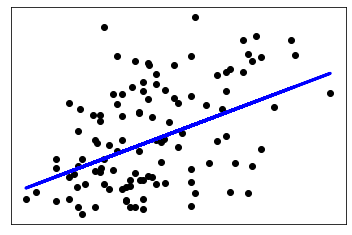

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, prediction, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()